# Conclusion of previous 2 chapters

For one matrix equation, there are 3 kinds of circumstances in terms of the location of the vector $b$.
1. $b$ is in the column space of $A$. Then the projection of $b$ into the column space of $A$ is $b$ itself.
$$Pb = b$$
2. $b$ is perpendicular to the column space of $A$. Then the projection of $b$ into the column space of $A$ is zero.
$$Pb = 0$$
And from chapter 14, we have learnt that row space and its nullspace are perpendicular to each other. Here, $b$ is perpendicular to the column space of $A$, namely is perpendicular to the row space of $A^T$.
$$A^Tb = 0$$
So we can say $b$ is in the nullspace of $A^T$, which is denoted by $b\in N(A^T)$. 
3. $b$ is neither in the column space of $A$ nor in the nullspace of $A^T$. Then $b$ can be partitioned into two parts. They are the projection into the column space and the projection into the nullspace of $A^T$.
$$\begin{array}{ll}\text{Column space:}&p = Pb\\
\text{Nullspace:}&e = b - p = (I-P)b
\end{array}$$
So the projection matrix that project vector into $N(A^T)$ is $(I-P)$.

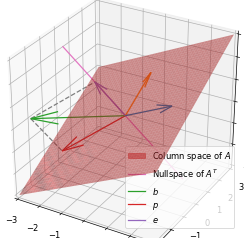

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches

Orig = [0, 0, 0]
# Z = 0.5*X + 0.5*Y
a1 = np.array([2, 0, 1])
a2 = np.array([0, 2, 1])
A = np.array([a1, a2]).T
b = np.array([-3, -2, 0])

def set_limit(ax, limit):
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)

def crop(x, limit):
    x[x>limit]  = np.nan
    x[x<-limit] = np.nan
    
def main():
    fig = plt.figure(figsize=(5,5), dpi=60)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    
    limit = 3
    set_limit(ax, 3)
    ax.set_zlim(-limit, limit)
    
    x = np.linspace(-3,3,10)
    
    p = A@np.linalg.inv(A.T@A)@A.T@b
    e = b - p
    na = e.reshape(-1, 1) @ np.array([[-2, 2]])
    legend = np.full(1,100)
    a1l, = ax.plot(legend, legend, legend, color='C0', label=r'$a_1$')
    a2l, = ax.plot(legend, legend, legend, color='C1', label=r'$a_2$')
    bl, = ax.plot(legend, legend, legend, color='C2', label=r'$b$')
    pl, = ax.plot(legend, legend, legend, color='C3', label=r'$p$')
    el, = ax.plot(legend, legend, legend, color='C4', label=r'$e$')
    NA, = ax.plot(na[0], na[1], na[2], color='C6', label=r"Nullspace of $A^T$")
    
    d1 = np.array([b, p]).T
    d2 = np.array([b, e]).T
    ax.plot(d1[0], d1[1], d1[2], color='C7', label=r'$e$', linestyle='dashed')
    ax.plot(d2[0], d2[1], d2[2], color='C7', label=r'$e$', linestyle='dashed')
    
    ax.quiver(0, 0, 0, a1[0], a1[1], a1[2], color='C0')
    ax.quiver(0, 0, 0, a2[0], a2[1], a2[2], color='C1')
    ax.quiver(0, 0, 0, b[0], b[1], b[2], color='C2')
    ax.quiver(0, 0, 0, p[0], p[1], p[2], color='C3')
    ax.quiver(0, 0, 0, e[0], e[1], e[2], color='C4')
    
    X,Y = np.mgrid[-3:3:700j,-3:3:700j]
    Z = 0.5*X + 0.5*Y
    Z[Z>3] = np.nan
    Z[Z<-3] = np.nan
    
    ax.plot_surface(X,Y,Z, color='C3', alpha=0.5)
    
    E3 = mpatches.Patch(color='C3', alpha=0.5, label=r"Column space of $A$")
    ax.legend(handles=[E3, NA, bl, pl, el], loc='lower right')
    ax.dist = 8


if __name__=="__main__":
    main()


# Least Squares Approximation

Least squares approximation is an application of the matrix projection.

We know two points can generate a line that goes perfectly through these two points. However, in the area of statistics, there are often many points, and we need to use these points to generate a line for best suiting these points.

A 2-dimentional line has the form 
$$y = C + D t$$
where $C$ and $D$ is the element of the matrix $x = \begin{bmatrix}C\\D\end{bmatrix}$, and $x$ is the vector we need to evaluate.

Now suppose that there are 3 points as follows
$$(1,1),(2,2),(3,2)$$
where the first element is $t$ and the second element is $y$. So if we write them in the form of $Ax = b$, then we will receive
$$A = \begin{bmatrix}1 & 1\\ 1 & 2\\ 1 & 3\end{bmatrix}\quad x = \begin{bmatrix}C\\ D\end{bmatrix}\quad b = \begin{bmatrix}1\\2\\2\end{bmatrix}$$

However, the unknown vector $x$ has only two elements, whereas there are 3 equations. We cannot receive the prefect line that goint through all these points. We therefore turn into allowing the existence of errors between the line and the points. The new line has the form
$$\begin{array}{ll}\text{line:} &A\hat{x} = p\\ \text{error:} &e = b-p\end{array}$$

where 
- $\hat{x}$ is the estimated vector, $\hat{x}=\begin{bmatrix}\hat{C}\\ \hat{D}\end{bmatrix}$.
- $p$ is the result of the line on the $y$-coordinate given $t$-coordinate values of the original points.
- $e$ is the $y$-coordinate error between the original points $b$ and the points $p$ within the line.

<font color='red'>Now back to the projection theorem, $p$ is in the column space of $A$, if we take $p$ equal to the projection of $b$ into the column space of $A$, then $p$ will be the nearest vector to $b$, and $e = b-p$ will be the least error.</font>
$$\left.\begin{array}{ll}p = Pb = A(A^TA)^{-1}A^Tb\\ A\hat{x}=p\end{array}\right\}\Rightarrow \hat{x} = (A^TA)^{-1}A^Tb$$

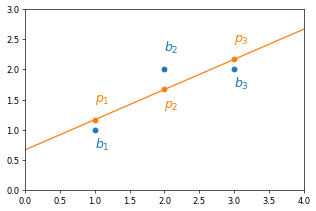

In [4]:
import matplotlib.pyplot as plt
import numpy as np

A = np.array([[1, 1],
              [1, 2],
              [1, 3]])
b = np.array([[1],
              [2],
              [2]])
    
def main():
    fig = plt.figure(figsize=(6,4), dpi=60)
    ax = fig.add_subplot(1, 1, 1)

    ax.set_xlim(0, 4)
    ax.set_ylim(0, 3)
    
    ax.scatter(A[:,1], b[:,0])
    ax.text(A[0][1], b[0]-.3, r"$b_1$", size=15, color='C0')
    ax.text(A[1][1], b[1]+.3, r"$b_2$", size=15, color='C0')
    ax.text(A[2][1], b[2]-.3, r"$b_3$", size=15, color='C0')
    
    x = np.linalg.inv(A.T@A)@A.T@b
    t = np.linspace(0, 4 , 10)
    y = x[0] + x[1]*t
    ax.plot(t, y, color='C1')

    p = A@x
    ax.scatter(A[:,1], p[:,0])
    ax.text(A[0][1], p[0]+.3, r"$p_1$", size=15, color='C1')
    ax.text(A[1][1], p[1]-.3, r"$p_2$", size=15, color='C1')
    ax.text(A[2][1], p[2]+.3, r"$p_3$", size=15, color='C1')
    plt.show()

if __name__=="__main__":
    main()

# The invertible condition
We notice that there is an inverted term in the equation of evaluating $\hat{x}$, which is $(A^TA)^{-1}$. The equation can be solved if and only if $(A^TA)$ is invertable. So, what can make $A^TA$ invertable?

> If $A$ has independent columns, then $A^TA$ is invertable.

We will proof this lemma below.

Suppose $A^TAx = 0$, if $A^TA$ is invertable, then $x$ must be $0$. This is what we learned in the previous chapter.

$$A^TAx = 0\Rightarrow x^TA^TAx = 0\Rightarrow (Ax)^TAx = 0\Rightarrow Ax=0$$

And because $A$ has independent columns, $x$ must be $0$. Thus $A^TA$ is invertable.